-0.0261217851535575*x**3 + 0.705451497457564*x

-0.0261217851535575*x**3 + 0.705451497457564*x + 2.22044604925031e-16

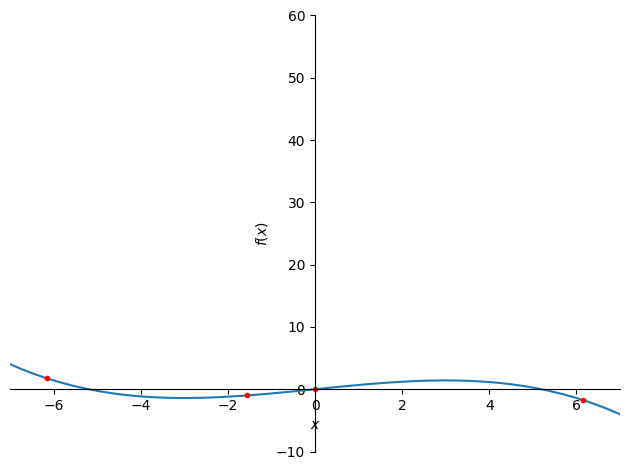

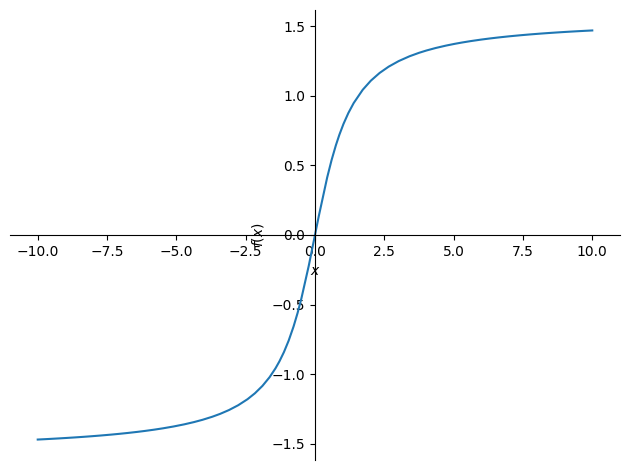

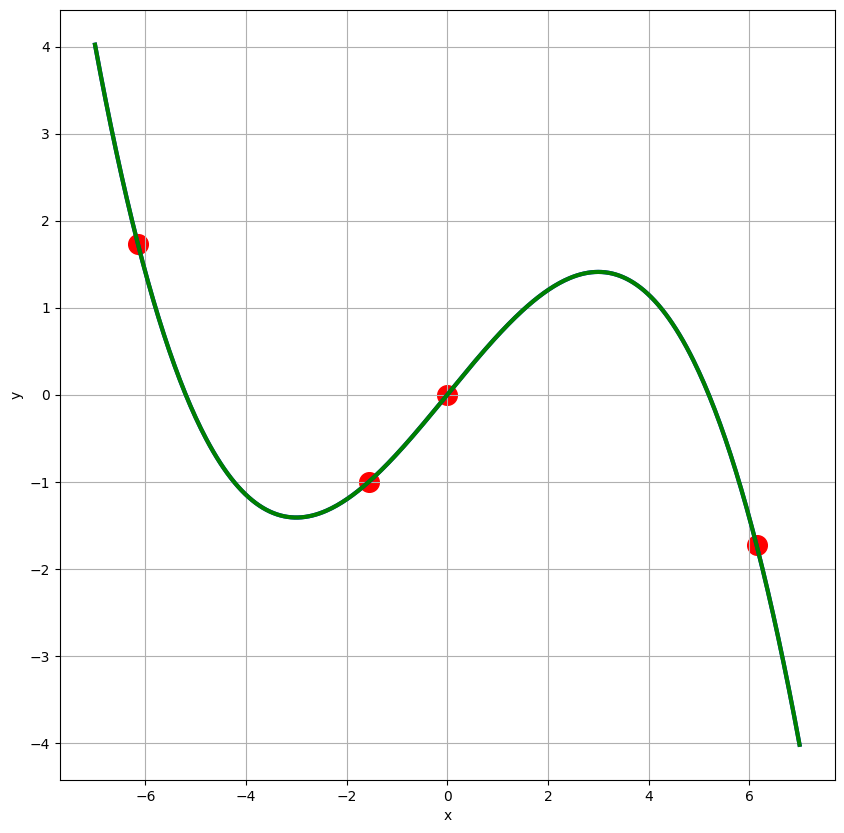

In [20]:
import sympy as sp

import numpy as np
import matplotlib.pyplot as plt

# Back to front
def newton_poly_b2f(coef, x_coef, x):
  n = len(x_coef) - 1
  result = coef[n]
  for i in range(1,n+1):
    result = coef[n-i] + (x-x_coef[n-i]) * result
  return result

# Front to back
def newton_poly_f2b(coef, x_coef, x):
  x_filter = 1
  result = coef[0]
  n = len(x_coef)
  for i in range(1,n):
    x_filter *= (x-x_coef[i-1])
    result += coef[i] * x_filter
  return result

# Newton formula:
#        ___1__     ___1__ ___2__     ___1__ ___2__ ___3__
# c1 + c2(x-x1) + c3(x-x1) (x-x2) + c4(x-x1) (x-x2) (x-x3)
# 
# b2f:
# 1. c3 + c4 (x-x3)
# 2. c2 + (x-x2) * [c3 + c4 (x-x3)] = c2 + c3(x-x2) + c4(x-x2)(x-x3)
# 3. ...
# 
# f2b:
# 1. c1
# 2. [c1] + c2(x-x1) 
# 3. [c1 + c2(x-x1)] + c3(x-x1)(x-x2)
# 4. ...



# x and y coeficients
x_coef = [np.tan(-(3**.5)),np.tan(-1),np.tan(0),np.tan(3**.5)]
y_coef = [-sp.Pow(3,.5), -1, 0, sp.Pow(3,.5)]

n = len(x_coef)
# coeficient table
coef = np.zeros([n,n])

coef[:,0] = y_coef

for j in range(1,n): # Columns
  for i in range(n-j): # Rows
    # Normal calculus
    # coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x_coef[i+j] - x_coef[i])
    # For symbolic calculus
    coef[i,j] = sp.Rational( '{}/{}'.format((coef[i+1,j-1] - coef[i,j-1]), (x_coef[i+j] - x_coef[i])))



x_s = np.linspace(-7, 7, 400)

f = newton_poly_b2f(coef[0,:], x_coef, x_s)
g = newton_poly_f2b(coef[0,:], x_coef, x_s)


x = sp.Symbol('x', real=True)
f_sp_ = newton_poly_b2f(coef[0,:], x_coef, x)
g_sp_ = newton_poly_f2b(coef[0,:], x_coef, x)

f_sp = sp.Lambda(x, f_sp_)
g_sp = sp.Lambda(x, g_sp_)

display(f_sp.expand()(x))
display(g_sp.expand()(x))

# sympy plot
def createMarkers(marks: list[float, float]):
  markers = []
  for mark in marks:
    markers.append({'args': [mark[0], mark[1], 'r.']})
  return markers


spplot = sp.plot(f_sp_, xlim=(-7,7), ylim=(-10, 60), markers=createMarkers(zip(x_coef, y_coef)))
sp.plot(sp.atan(x))
display()

# MatPlotLib pyplot plot
plt.figure(figsize=(10,10))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x_s, f, 'b', lw=3)
plt.plot(x_s, g, 'g', lw=3)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()